# Probablity Distributions
In this notebook we'll pick up where we left off with Frequency Distributions.

A [Frequency Distribution](https://en.wikipedia.org/wiki/Frequency_(statistics)) arises from making observations of random variable (often by recording observations for a stochastic system), and them counting the frequency of the outcomes.

A [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution) "is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment." (wikipedia)
In other words, the probability distribution is a mathematical function that describes the theoretical frequency distribution for a specific type of experiment.

As usual, the first code block just imports the modules we will use.

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Frequency Distribution Class
Copied in from previous notebook

In [16]:
class FrequencyDist:
    """ Represents the Frequency Distribution for a set of observations on a discrete random variable """

    def __init__(self, observations, labels: dict = None, title='Trials'):
        """ observations is a 1D sequence of empirical data, labels optionally relabel observation values """
        self.n_obs = len(observations)
        self.title = title

        # frequency for each unique category
        self.categories, self.counts = np.unique(observations, return_counts=True)
        self.n_cat = len(self.categories)
        self.proportions = self.counts / self.n_obs
        # matching category labels, if supplied
        self.category_labels = tuple(labels[c] for c in self.categories) if labels else self.categories

    def get_frequencies(self):
        """ Return the frequency count of each category as a dict """
        return {
            cat: freq for cat, freq in zip(self.category_labels, self.counts)
        }

    def print_frequencies(self):
        """ Print the frequency of each category as a fraction of observations """
        print(f'{self.title}:', [f'p({o})=", {n}/{self.n_obs}' for o, n in self.get_frequencies().items()])

    def bar(self, axes=None, **options):
        """ Plot distribution as a bar chart. """
        axes = axes or plt.gca()  # If no axes are provided, draw on current axes
        axes.set(**options)
        axes.set_title(f'Frequency distribution for {self.n_obs} {self.title}')
        axes.bar(self.category_labels, self.proportions)

    def plot(self, axes=None, **options):
        """ Plot distribution as a line graph. """
        axes = axes or plt.gca()  # If no axes are provided, draw on current axes
        axes.set(**options)
        axes.set_title(f'Frequency distribution for {self.n_obs} {self.title}')
        axes.plot(self.categories, self.proportions)


## Probability Mass Functions
In many of our computational experiments, we counted the various discrete outcomes from a simulated process.
We can imagine that for a given process / experiment, each possible outcome has a theoretical probability of being observed.

The "Probablity Mass Function" (PMF) is a function that gives us the theoretical probability for each observation.

Here's an example using dice...

Experimental result:
Rolls: ['p(2)=", 286/10000', 'p(3)=", 560/10000', 'p(4)=", 828/10000', 'p(5)=", 1150/10000', 'p(6)=", 1385/10000', 'p(7)=", 1584/10000', 'p(8)=", 1358/10000', 'p(9)=", 1132/10000', 'p(10)=", 852/10000', 'p(11)=", 584/10000', 'p(12)=", 281/10000']

Theoretical Probablilty Mass Function for 2 fair 6-sided dice:
   pmf(n) when 2 < n < 12, 0 otherwise

pmf(2)=0.028, pmf(3)=0.056, pmf(4)=0.083, pmf(5)=0.111, pmf(6)=0.139, pmf(7)=0.167, pmf(8)=0.139, pmf(9)=0.111, pmf(10)=0.083, pmf(11)=0.056, pmf(12)=0.028


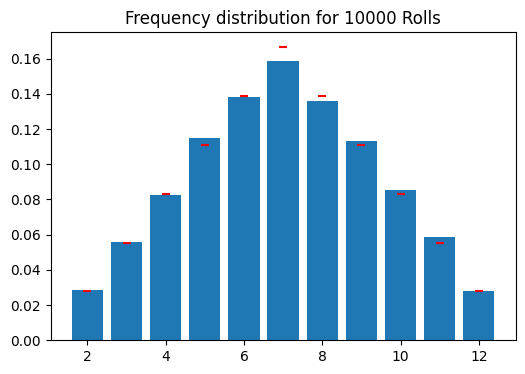

In [17]:
def roll(sides=6):
    """ simulate an n-sided dice roll.  Return int value on die face. """
    return np.random.choice(range(1, sides+1))

def roll_dice(n_dice=2, sides=6):
    """ simulate rolling n dice and return the sum of their face values """
    return sum(roll(sides) for r in range(n_dice))

# Experiment:
n_sides = 6
n_dice = 2
n_rolls = 10000
rolls = [roll_dice(n_dice, n_sides) for i in range(n_rolls)]
# Experimental Frequency Distribuiton:
dist = FrequencyDist(rolls, title="Rolls")

# Output
print('Experimental result:')
dist.print_frequencies()


# Theoretical Probability Mass Function for 2-dice
min_roll = n_dice
max_roll = n_dice*n_sides
possible_rolls = range(min_roll, max_roll+1)
roll_p = 1 / (n_sides**n_dice)  # probability of a given "ordered" roll - not the sum of the roll!
def two_dice_pmf(n):
    """ Probability Mass Function - return probability of observing n as the sum of 2 dice """
    mid_roll = list(possible_rolls)[ len(possible_rolls)//2 ]
    return 0 if n < min_roll or n > max_roll else \
           roll_p * (n-1) if n <= mid_roll else \
           roll_p * (max_roll+1 - n)

# PMF gives the expected long-run proportion (i.e., probability) of each possible roll...
dice_pmf = [two_dice_pmf(v) for v in possible_rolls]

print('''
Theoretical Probablilty Mass Function for 2 fair {n}-sided dice:
   pmf(n) when {min} < n < {max}, 0 otherwise
'''.format(n=n_sides, min=min_roll, max=max_roll))
print(', '.join( ['pmf({n})={p}'.format(n=v, p=round(PMF[v-min_roll], 3)) for v in possible_rolls] ))

# Plot theoretical PMF on top of our experimental observations
_, ax = plt.subplots(1, 1, figsize=(6, 4))
dist.bar(axes=ax)
ax.scatter(possible_rolls, dice_pmf, c='red', marker='_')
plt.show()

### Poisson Process
A Poisson Process describes a counting process where "events" occur randomly at a fixed rate (in time or space).  Examples would include the number of shoppers arriving at a store per hour,  or the number cellphone towers in a city block.

Here we will simulate a recurring event (let's imagine its forest fire :-) with a fixed probability of occurring in any time step, and count the number of "fires" per time period.

Fires per period: min=0, max=10, mean=4.03


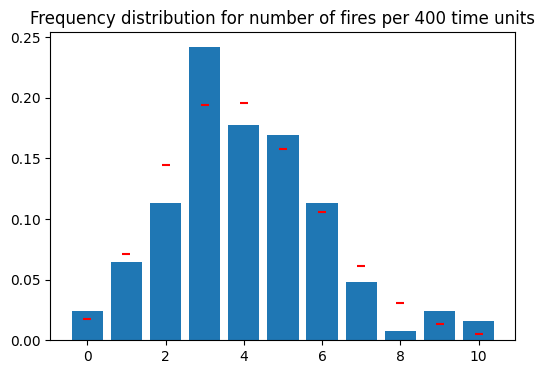

In [18]:
def ignition():
    """ return True iff there is an ignition event """
    return np.random.random() < f

def next_ignition():
    """ return the number of time units elapsed to next ignition """
    steps = 0
    while not ignition():
        steps+=1    # one more time unit without an ignition...
    return steps

def get_ignitions(n_event):
    """ return an array with time units elapsed between each subsequent ignition event """
    return np.array( [ next_ignition() for event in range(n_event) ] )

def get_counts_per_period(intervals, period):
    """ return observations of number of fires per time period from the fire intervals """
    # simulate passage of time and count number of "fires" that fall within each time period.
    counts = [0]
    time_step = 0
    for t in intervals:
        time_step += t
        if time_step < period:
            counts[-1] += 1
        else:  # crossed a period boundary - append new empty bin(s), count t, and restart timer with remainder of last time_step
            counts += [0] * (time_step // period)
            counts[-1] += 1
            time_step = time_step % period
    return counts


# Experiment
mean_interval = 100   # average time interval between fire ignitions in some unit time
f = 1/mean_interval   # fire ignition rate (per unit time)

n_observations = 500  # total number of ignition observations to make
avg_per_interval = 4  # configure and arbitrary period in which we should expect, on average, N fires to occur
period_size = avg_per_interval * mean_interval

ignition_intervals = get_ignitions(n_observations)
fire_counts = get_counts_per_period(ignition_intervals, period_size)

# Frequency distribution (counting!)
dist = FrequencyDist(fire_counts)

# Theoretical poisson PMF
mean = np.mean(fire_counts)
poisson_pmf = stats.poisson.pmf(dist.categories, mu=mean)

# Output
print("Fires per period: min={min}, max={max}, mean={mean}".format(min=min(fire_counts), max=max(fire_counts), mean=round(mean, 2)))

_, ax = plt.subplots(1, 1, figsize=(6, 4))
dist.bar(ax)
ax.scatter(dist.categories, poisson_pmf, c='red', marker='_')
ax.set_title(f"Frequency distribution for number of fires per {period_size} time units")
plt.show()

## Probablity Density Functions
When observations take on continuous values, the probability function is also continuous.
This means the probablity of observing any exact value is zero.

In such systems, it only makes sense to talk about probability over some interval, which is the area under the curve (integral!) of the "Probability Density Function" on that interval.

### Negative Exponential
If we count the elapsed time between events in a Poisson Process, we get an Exponential PDF with a negative coefficient.  Examples would include time between shoppers arriving at a store.

So, extending our experiment above, we'll examine the elapsed time between fires (fire intervals)...

Fires intervals: min=0, max=767, mean=99.0


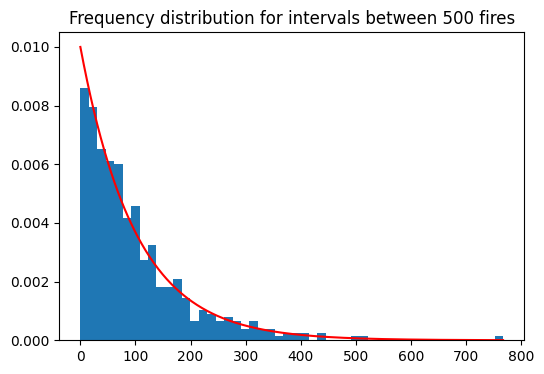

In [19]:
print("Fires intervals: min={min}, max={max}, mean={mean}".format(
    min=round(min(ignition_intervals)), max=round(max(ignition_intervals)), mean=np.round(np.mean(ignition_intervals))
))

_, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Frequency distribution for intervals between {n_observations} fires")
ax.hist(ignition_intervals, bins=n_observations//10, density=True)

# Theoretical exponential PDF
xs = np.linspace(min(ignition_intervals), max(ignition_intervals), n_observations)
ax.plot(xs, stats.expon.pdf(xs, scale=mean_interval), c='red')
plt.show()

# TODO
* Cummulative Density Functions